# Limpando Dataset

Uma vez das posse dos dados precisamos garantir que eles estejam em um formato no qual nos podemos usar para criar modelos de aprendizado de máquina. A maioria dos modelos da biblioteca *sciki-learn* requer que nossa variaveis (*features*) sejam numericas (inteiras ou pontos flutuantes). Alem disso, muitos modelos falham quando recebem valores ausentes (NaN no pandas ou numpy). 

Nosso objetivo nesse notebook será conhecer o conjunto de dados que vamos trabalhar e verificar como está sua estrutura antes de analisarmos os dados respondendo algumas perguntas como:

* Os tipos dos dados fazem sentido em relação a sua variável?
* Nosso conjunto de dados apresenta valores ausentes, caso sim como lidar?
* Existem valores discrepantes?

A limpeza dos dados, em alguns casos, pode tomar bastante tempo mas é uma parte fundamental para análise exploratória de dados. 

In [1]:
# importando bibliotecas
import numpy as np
import pandas as pd

# configuracoes globais pandas
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

import matplotlib.pyplot as plt 

# biblioteca para visualizacao grafica dos dados ausentes
import missingno as msno

In [2]:
# importando o conjunto de dados

enem_df = pd.read_csv("enem_goias.csv")

In [3]:
# visualizando as primeira entradas

enem_df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001008095,2019,5204904,Campos Belos,52,GO,29,F,3,1,1,3148004.0,Patos de Minas,31.0,MG,1,10,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506138,Redenção,15,PA,1,1,1,1,505.0,507.0,511.0,518.0,449.2,546.9,518.9,469.8,EABCBAAEBDEECDABBBCBAECDBDECBBBADDBCBEADADABE,BACDBBAABACCDCCCCBCBCACEEACCAACCBBBAAAADDDBAB,99999EBEEEBCBAAEDBECADCECCAEEDECEEEBE.BDBC.BCB...,EDBCBEAADCBAACCACBECACEBEACDBBABABCAECDCCCDCC,1,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,BACCCBABBADCBCEEEBCACACEEDBCCADBEADBADBBBACDB,BDABEABCADBCBAADDBECDAAECDAECBECBCCDEEAAADDBBC...,DBEBACABCDBABECEEEDCBDCCEDCDABEDAADDDECACAECB,1.0,100.0,120.0,120.0,120.0,0.0,460.0,B,E,C,B,2,G,A,B,C,A,A,B,A,A,A,A,A,A,A,A,A,B,A,B,B
1,190001009705,2019,5212501,Luziânia,52,GO,19,M,1,2,1,1508126.0,Ulianópolis,15.0,PA,1,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1502152,Canaã dos Carajás,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,B,B,5,B,A,B,C,A,B,B,A,A,A,A,A,A,B,A,A,D,A,A,B
2,190001012229,2019,5208707,Goiânia,52,GO,19,F,1,3,1,1702109.0,Araguaína,17.0,TO,1,1,1,1.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1508084,Tucumã,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,C,B,6,F,A,B,D,A,B,B,B,A,A,A,A,A,B,A,A,E,A,A,B
3,190001021960,2019,5208707,Goiânia,52,GO,20,F,1,1,1,1505536.0,Parauapebas,15.0,PA,1,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505536,Parauapebas,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E,E,A,D,2,E,C,D,D,B,A,B,A,B,A,B,A,A,C,A,B,C,A,B,B
4,190001031454,2019,5208707,Goiânia,52,GO,18,F,1,3,1,1502400.0,Castanhal,15.0,PA,2,0,2,1.0,0,15045650.0,1502400.0,Castanhal,15.0,PA,2.

# Quais são os tipos de dados das minhas features?
Vamos realizar o levantamento dos tipos de variáveis que compõem o DataFrame a fim de estabelecer a divisão entre as variáveis numéricas e as variáveis categóricas. Esse passo é interessante de se realizar porque quando carregamos um conjunto de dados com o pandas ele tentar interpretar esses dados e em alguns casos ele pode falhar então é interessante verificar se os dados foram lidos corretamente e estão coerentes. Sem falar que contamos com o dicionario de variaveis que foi disponibilizado pelo Enem que fala como eles categorizaram as variaveis.

In [21]:
# criando dataframe com nome da variavel e seu tipo
var_tipos = enem_df.dtypes.to_frame(name="tipo")
print(f"{var_tipos}\n")

# numero total de cada tipo
print(f"Representacao dos tipos de dados:\n{var_tipos.tipo.value_counts(normalize=True)}")


                                tipo
NU_INSCRICAO                   int64
NU_ANO                         int64
CO_MUNICIPIO_RESIDENCIA        int64
NO_MUNICIPIO_RESIDENCIA       object
CO_UF_RESIDENCIA               int64
SG_UF_RESIDENCIA              object
NU_IDADE                       int64
TP_SEXO                       object
TP_ESTADO_CIVIL                int64
TP_COR_RACA                    int64
TP_NACIONALIDADE               int64
CO_MUNICIPIO_NASCIMENTO      float64
NO_MUNICIPIO_NASCIMENTO       object
CO_UF_NASCIMENTO             float64
SG_UF_NASCIMENTO              object
TP_ST_CONCLUSAO                int64
TP_ANO_CONCLUIU                int64
TP_ESCOLA                      int64
TP_ENSINO                    float64
IN_TREINEIRO                   int64
CO_ESCOLA                    float64
CO_MUNICIPIO_ESC             float64
NO_MUNICIPIO_ESC              object
CO_UF_ESC                    float64
SG_UF_ESC                     object
TP_DEPENDENCIA_ADM_ESC       float64
T

Nosso conjunto de dados tem majoritariamente variáveis numéricas e 30% sendo representado por variáveis categóricas (*object*). Temos um conjunto de dados que foi bem tratado e suas variáveis estão bem representadas segundo o dicionario fornecido pelo Enem. Vale lembra que caso queira usar as variáveis do tipo *object* na criação do modelo de aprendizado de máquina será necessário tratá-las antes de alimentar o modelo.




# Valores Ausentes
Um passo importante na análise de dados é verificação de dados ausentes, isso porque a qualidade de um conjunto de dados está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas. Caso eles sejam significativos será necessário um tratamento nos dados antes de realizarmos nossas análises

In [5]:
enem_df.isna().sum()

NU_INSCRICAO                        0
NU_ANO                              0
CO_MUNICIPIO_RESIDENCIA             0
NO_MUNICIPIO_RESIDENCIA             0
CO_UF_RESIDENCIA                    0
SG_UF_RESIDENCIA                    0
NU_IDADE                            0
TP_SEXO                             0
TP_ESTADO_CIVIL                     0
TP_COR_RACA                         0
TP_NACIONALIDADE                    0
CO_MUNICIPIO_NASCIMENTO          5081
NO_MUNICIPIO_NASCIMENTO          5081
CO_UF_NASCIMENTO                 5081
SG_UF_NASCIMENTO                 5081
TP_ST_CONCLUSAO                     0
TP_ANO_CONCLUIU                     0
TP_ESCOLA                           0
TP_ENSINO                       88691
IN_TREINEIRO                        0
CO_ESCOLA                      133984
CO_MUNICIPIO_ESC               133984
NO_MUNICIPIO_ESC               133984
CO_UF_ESC                      133984
SG_UF_ESC                      133984
TP_DEPENDENCIA_ADM_ESC         133984
TP_LOCALIZAC

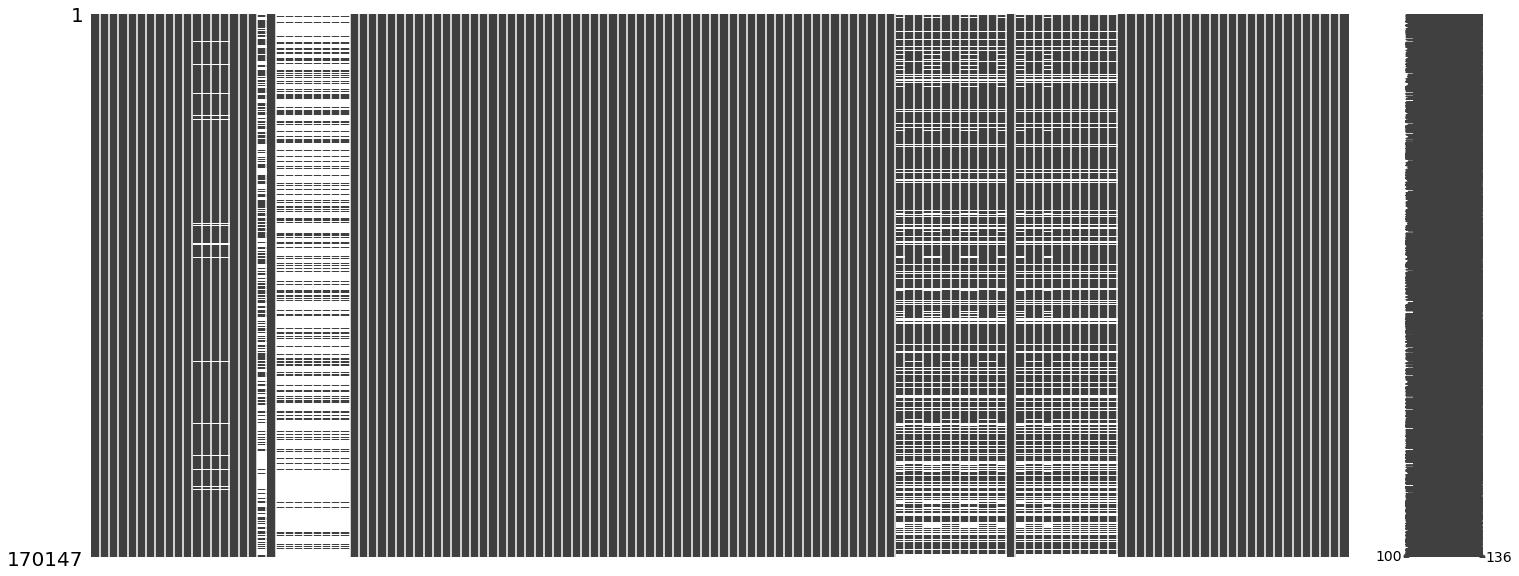

In [25]:
msno.matrix(enem_df);

